## Acerca del conjunto de datos

El analisis de personalidad de clientes es un analisis detallado de los clientes ideales de una empresa. Ayuda a la empresa a conocer mejor a sus clientes y les permite modificar los productos de acuerdo con las necesidades, comportmaientos e inquietudes de los diferentes tipos de clientes.

Ayuda a la empresa a modificar su producto en funcion de su cliente objetivo de distintos tipos de segmentos de clientes. Ejemplo, en lugar de gastar dinero para comercializar un nuevo producto a todos los clientes, una empresa puede analizar que segmento de clientes tienen mas probabilidades de comprar el producto y luego comercializarlo solo en ese segmento en particular

### Cargar librerias

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

from scipy.stats import boxcox, zscore
from scipy.special import inv_boxcox

### Cargar Datos

In [174]:
df = pd.read_csv('./marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [175]:
df.shape

(2240, 29)

> El dataset contiene 2240 observaciones y 29 caracteristicas

### Entendiendo los datos

In [176]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

__Atributos de las personas__

- ID: Identificador unico del cliente.
- Year_Birth: Fecha de nacimento del cliente.
- Education: Nivel educativo.
- Marital_Status: Estado civil.
- Income: Ingresos familiares anuales del cliente.
- Kidhome: Numero de niños en el hogar del cliente.
- Teenhome: Numero de adolescentes en el hogar del cliente.
- Dt_Customer: Fecha de alta del cliente en la empresa.
- Recency: Numero de dias desde la ultima compra del cliente.
- Complain: 1 si el cliente se quejo en los ultimos dos años, 0 en caso contrario.

__Atributos del producto__

- MntWines: Cantidad gastada en vino en los ultimos dos años.
- MntFruits: Cantidad gastada en frutas en los utlimos dos años.
- MntMeatProduts: Cantidad gastada en carnes en los utlimos dos años.
- MntFishProduct: Cantidad gastada en pescado en los utlimos dos años.
- MntSweetProduct: Cantidad gastada en dulces en los ultimos dos años.
- MntGoldProds: Cantidad gastada en oro en los ultimos dos años. 

__Atributos de la promocion__

- NumDealsPurchases: Numero de compras realizadas con descuento.
- AcceptedCmp1: 1 si el cliente acepto la oferta en la primera campaña, 0 en caso contrario.
- AcceptedCmp2: 1 si el cliente acepto la oferta en la segunda campaña, 0 en caso contrario.
- AcceptedCmp3: 1 si el cliente acepto la oferta en la tercera campaña, 0 en caso contrario.
- AcceptedCmp2: 1 si el cliente acepto la oferta en la cuarta campaña, 0 en caso contrario.
- AcceptedCmp2: 1 si el cliente acepto la oferta en la quinta campaña, 0 en caso contrario.
- Response: 1 si el cliente acepto la oferta en la ultima campaña, 0 en caso contrario.

__Atributos del lugar__

- NumWebPurchases: Numero de compras realizadas a traves del sitio web de la empresa.
- NumCatalogPurchases: Numero de compras realizadas por el catalogo de la empresa.
- NumStorePurchases: Numero de compras realizadas directamente en la tienda.
- NumWebVisitsMonth: Numero de visitas al sitio web de la empresa en el ultimo mes.

__Objetivo__

Realizar una agrupacion para resumir y comprender los segmentos de clientes y de esta forma identificar grupos distintos dentro de la base de clientes.

### Analisis Estadistico descriptivo

In [177]:
# mostrar las variables junto a su tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

> Lo anterior muestra que la variable _Income_ presenta valores faltantes. Debemos tratarlos.

__Resumen estadistico de las variables numericas__

In [178]:
df.describe(include='number').round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.16,3246.66,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0


> El promedio de ingresos por cliente es de 52247.25 con una desviacion estandar de $\pm$ 	25173.08. Este resultado puede ser distinto debido a los datos que faltan.

> El ingreso minimo es de 1730 y el maximo es de 666666. El rango donde se encuenta gran parte de los datos viene dado por el promedio y la suma de la desviacion estandar. Dicho rango es de (27074.17, 77420.33). Al comparar los valores minimo y maximo con el rango, vemos que tales valores son atipicos.

> El promedio de niños en el hogar es de 0.44 lo que indica que gran parte de los hogares no tienen niños.

> El promedio de adolescentes en el hogar es de 0.51 lo que indica que gran parte de los hogares tienen al menos 1.

> El mayor ingreso para la empresa viene de las carnes y de los vinos.

__Resumen estadistico de las variable de tipo object__

In [179]:
df.describe(include='object').T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


> La mayor parte de los clientes son graduados y casados.

### Limpieza de datos

#### Tratamiento de valores faltantes

In [180]:
# variable con su respectiva cantidad de valores nulos
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

> Hay 24 observaciones con valores faltantes en la variable _Income_. Esto representa el 1% del total de observaciones por lo que eliminamos tales registros.

In [181]:
# eliminar y actualizar el dataframe
df.dropna(inplace=True)
# mostrar nuevamente variables junto a su cantidad de valores faltantes
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

#### Omitir caracteristicas innecesarias

De las 29 caracteristicas, hay 3 que no aportan valor al analisis que estamos realizando y son: _ID_, _Z_Revenue_ y _Z_CostContact_. Elimanos estas caracteristicas y actualizamos el dataframe

In [182]:
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

#### Calcular edad de los clientes

Vamos a utilizar la fecha de nacimiento y la fecha de alta en la empresa para estimar la edad que tenian cuando comenzaron a ser clientes

In [183]:
# verificamos el formato de Dt_Customer
df[['Dt_Customer']].head()

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014


In [184]:
# damos el formato de fecha adecuado a los datos de Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')

In [185]:
df['Cus_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cus_age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,55
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,60
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,48
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,30
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,33


#### Calcular cantidad de dias como clientes

Primero, vamos a obtener la ultima fecha en la que se registro un nuevo cliente y a partir de ella, calculamos los dias que llevan como clientes los usuarios.

In [186]:
ultima_fecha = df['Dt_Customer'].max()

In [187]:
df['Dias_como_cliente'] = (ultima_fecha - df['Dt_Customer']).dt.days
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cus_age,Dias_como_cliente
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,1,55,663
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,0,60,113
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,48,312
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,0,30,139
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,33,161


#### Eliminar caracteristicas innecesarias

Eliminamos Dt_Customer y Year_Birth ya que dejan de ser relevantes

In [188]:
df.drop(columns=['Year_Birth', 'Dt_Customer'], inplace=True)
df.shape

(2216, 26)

#### Limpiar valores categoricos

Las variables categoricas son: Education y Marital_Status. Veamos el contenido de cada una.

In [189]:
# mostrar categorias junto a su respectiva cantidad
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Vamos a renombrar las categorias por unas mas adecuadas para mejorar la diferenciacion entre educacion basica, universitaria y pos-universitaria

In [190]:
# diccionario con las nuevas categorias
new_categories = {'PhD':'Posgrado',
                  'Master':'Posgrado',
                  '2n Cycle':'Universitario',
                  'Graduation':'Universitario',
                  'Basic':'Basico'}

In [191]:
df['Education'].replace(new_categories, inplace=True)
df['Education'].value_counts()

Universitario    1316
Posgrado          846
Basico             54
Name: Education, dtype: int64

Veamos el contenido de Marital_Status

In [192]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Clasifiquemos el estado civil en dos: solo o en pareja

In [193]:
new_Marital = {'Married':'Pareja',
               'Together':'Pareja',
               'Single': 'Solo',
               'Divorced':'Solo',
               'Widow':'Solo',
               'Alone':'Solo',
               'Absurd':'Solo',
               'YOLO':'Solo'}

In [194]:
df['Marital_Status'].replace(new_Marital, inplace=True)
df['Marital_Status'].value_counts()

Pareja    1430
Solo       786
Name: Marital_Status, dtype: int64

#### Variable total de gastos por cliente

Vamos a crear una nueva caracteristicas que contenga el total de dinero gastado por cada cliente

In [195]:
df['Expenses'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']
df['Expenses'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Expenses, dtype: int64

#### Combinar la cantidad de niños y adolescentes en una nueva variable

In [196]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Kids'].head()

0    0
1    2
2    0
3    1
4    1
Name: Kids, dtype: int64

#### Variable con el total de campañas aceptadas por cliente

In [197]:
df['TotalAcceptedCamp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalAcceptedCamp'].head()

0    0
1    0
2    0
3    0
4    0
Name: TotalAcceptedCamp, dtype: int64

#### Variable con el total de compra por los diferentes medios

In [198]:
df['TotalPurchases'] = df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases'] + df['NumWebPurchases']
df['TotalPurchases'].head()

0    25
1     6
2    21
3     8
4    19
Name: TotalPurchases, dtype: int64

#### Seleccion de caracteristicas relevantes

Vamos a seleccionar las columnas que consideramos mas relevantes para el analisis

In [199]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Cus_age', 'Dias_como_cliente', 'Expenses',
       'Kids', 'TotalAcceptedCamp', 'TotalPurchases'],
      dtype='object')

In [200]:
select_columns = ['Education', 'Marital_Status', 'Income', 'Kids', 'Dias_como_cliente', 'Recency', 'Expenses', 'Cus_age', 'TotalPurchases','TotalAcceptedCamp', 'Complain', 'Response']

df_data = df[select_columns]
df_data.head()

,Education,Marital_Status,Income,Kids,Dias_como_cliente,Recency,Expenses,Cus_age,TotalPurchases,TotalAcceptedCamp,Complain,Response
0,Universitario,Solo,58138.0,0,663,58,1617,55,25,0,0,1
1,Universitario,Solo,46344.0,2,113,38,27,60,6,0,0,0
2,Universitario,Pareja,71613.0,0,312,26,776,48,21,0,0,0
3,Universitario,Pareja,26646.0,1,139,26,53,30,8,0,0,0
4,Posgrado,Pareja,58293.0,1,161,94,422,33,19,0,0,0


In [201]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2216 non-null   object 
 1   Marital_Status     2216 non-null   object 
 2   Income             2216 non-null   float64
 3   Kids               2216 non-null   int64  
 4   Dias_como_cliente  2216 non-null   int64  
 5   Recency            2216 non-null   int64  
 6   Expenses           2216 non-null   int64  
 7   Cus_age            2216 non-null   int64  
 8   TotalPurchases     2216 non-null   int64  
 9   TotalAcceptedCamp  2216 non-null   int64  
 10  Complain           2216 non-null   int64  
 11  Response           2216 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 225.1+ KB


#### Clasificar variables de acuerdo al tipo de datos

In [202]:
# variables de tipo binario
var_binary = [col for col in df_data.columns if df_data[col].nunique() == 2]
var_binary

['Marital_Status', 'Complain', 'Response']

In [203]:
# variables de tipo categorico
var_category = [col for col in df_data.columns if 2 < df_data[col].nunique() < 10]
var_category

['Education', 'Kids', 'TotalAcceptedCamp']

In [204]:
# variables de tipo numerica
var_numeric = [col for col in df_data.select_dtypes(include=['number']).columns if col not in var_binary + var_category]
var_numeric

['Income',
 'Dias_como_cliente',
 'Recency',
 'Expenses',
 'Cus_age',
 'TotalPurchases']

#### Deteccion de outliers

Vamos a estandarizar los datos de las variables numericas a traves del z-score para luego determinar aquellos datos que son anormales

In [205]:
z_scores = pd.DataFrame(zscore(df_data[var_numeric]), columns=var_numeric)
z_scores.head()

,Income,Dias_como_cliente,Recency,Expenses,Cus_age,TotalPurchases
0,0.234063,1.529129,0.310532,1.675488,0.897752,1.319446
1,-0.234559,-1.188411,-0.380509,-0.962358,1.313688,-1.157987
2,0.769478,-0.205155,-0.795134,0.280250,0.315443,0.797881
3,-1.017239,-1.059945,-0.795134,-0.919224,-1.181925,-0.897205
4,0.240221,-0.951244,1.554407,-0.307044,-0.932363,0.537099


Identificamos los registros donde los z-score exceden el intervalo que se consideran datos normales. En términos de estadística, si el valor de un z-score es mayor que 3 (en valor absoluto), se considera un outlier. Esto se debe a que en una distribución normal estándar, el 99.7% de los datos caen dentro de 3 desviaciones estándar de la media. Cualquier valor más allá de este límite es poco común.

In [206]:
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]
outliers

,Income,Dias_como_cliente,Recency,Expenses,Cus_age,TotalPurchases
21,-1.978761,0.916447,-0.242301,1.862958,-0.849176,3.666489
164,4.171896,-1.153824,1.692615,1.660557,-0.266867,2.884141
192,-0.620138,-0.383031,1.727167,-0.899315,5.722602,-1.157987
239,0.315279,-1.534279,-0.898791,-0.970653,6.388099,-1.418770
339,1.243067,-0.383031,-0.449614,2.067018,5.805789,0.015534
432,0.598463,0.832450,0.932470,0.787911,0.149069,3.144924
617,4.376684,0.185182,-0.622374,-0.829636,-0.599615,-1.809943
655,4.040019,-1.045122,1.105230,-0.997198,-0.433241,-1.940335
687,4.313348,1.682299,-0.967895,1.841390,-1.181925,3.796880
987,0.934215,-0.526319,-0.104093,3.117179,-0.017306,1.449838


Una vez encontradas las observaciones con outliers procedemos a eliminarlas del DataFrame.

In [207]:
df = df_data.drop(outliers.index)
df.shape

(2198, 12)

### Analisis Exploratorio de los Datos

Creamos una copia del dataframe

In [208]:
df_copy = df.copy()
df_copy.head()

,Education,Marital_Status,Income,Kids,Dias_como_cliente,Recency,Expenses,Cus_age,TotalPurchases,TotalAcceptedCamp,Complain,Response
0,Universitario,Solo,58138.0,0,663,58,1617,55,25,0,0,1
1,Universitario,Solo,46344.0,2,113,38,27,60,6,0,0,0
2,Universitario,Pareja,71613.0,0,312,26,776,48,21,0,0,0
3,Universitario,Pareja,26646.0,1,139,26,53,30,8,0,0,0
4,Posgrado,Pareja,58293.0,1,161,94,422,33,19,0,0,0


Mostramos las variables que son numericas

In [209]:
var_numeric

['Income',
 'Dias_como_cliente',
 'Recency',
 'Expenses',
 'Cus_age',
 'TotalPurchases']

Creamos un histograma para cada variable numerica

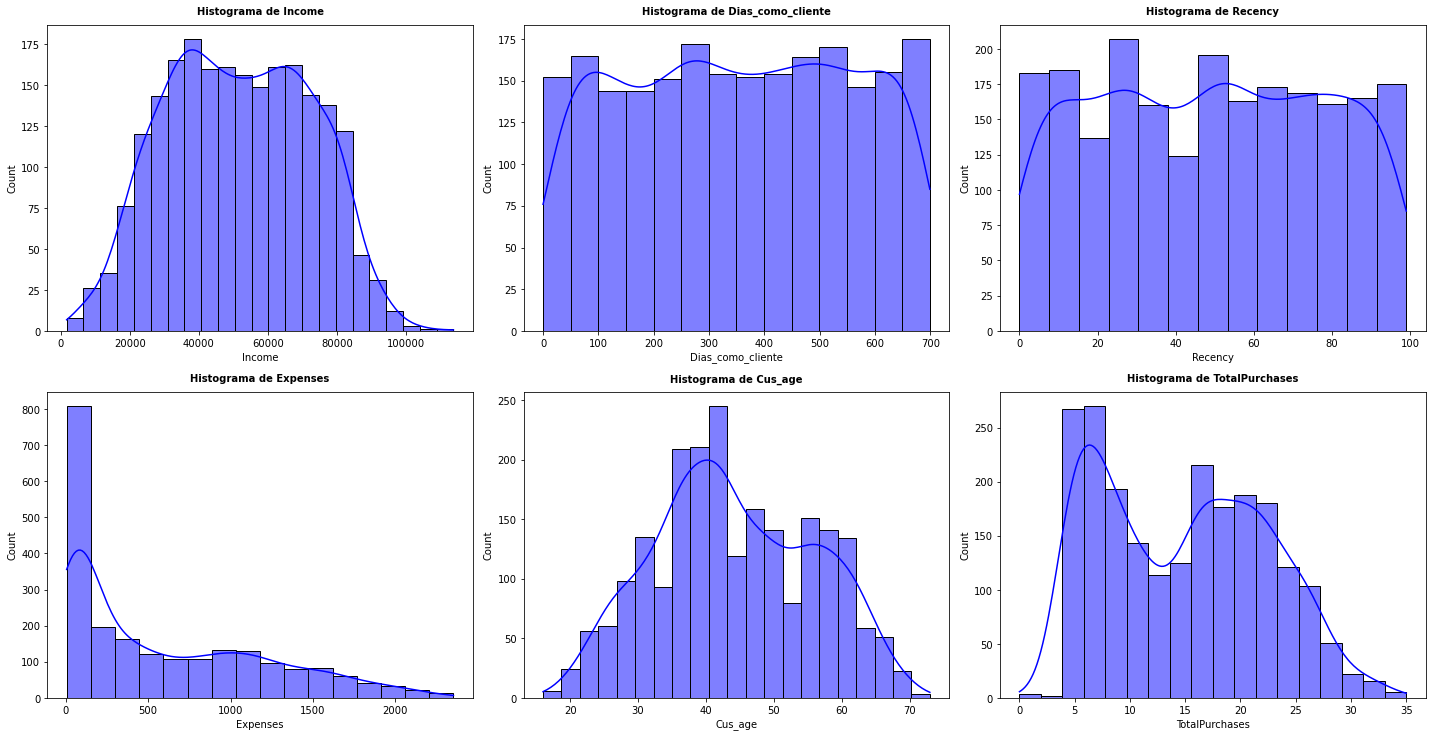

In [210]:
plt.figure(figsize=(20,15))
n_cols = 3
n_row = 3

x = 1
for col in var_numeric:
    plt.subplot(n_row, n_cols, x)
    sns.histplot(data=df_copy, x=col, kde=True, color='blue')
    plt.title(f'Histograma de {col}', pad=10, fontweight='bold', fontsize=10)
    plt.tight_layout()
    x += 1

> Vemos claramente que el ingreso de los clientes sigue una distribucion normal lo que indica que la mayoria ganan alrededor del ingreso medio.

> La distribucion del numero de dias desde la ultima compra y del numero de dias como cliente es relativamente uniforme lo que indica que han habido amplios periodos de tiempo donde los clientes han interactuado con la empresa. 

> La distribucion de los gastos es exponencial lo que significa que la mayoria de los clientes tienen un gasto menor y este disminuye rapidamente a medida que aumenta el monto.

> El total de compras sigue una distribucion binomial lo que refleja que existen comportamientos de compra comunes entrelos clientes, como realizar una cantidad de compra especifica.

> El promedia de edad de la mayoria de los clientes es de 41 años y gran parte de ellos estan entre los 30 y 0 años. 

Creamos un grafica de barra para las demas variables

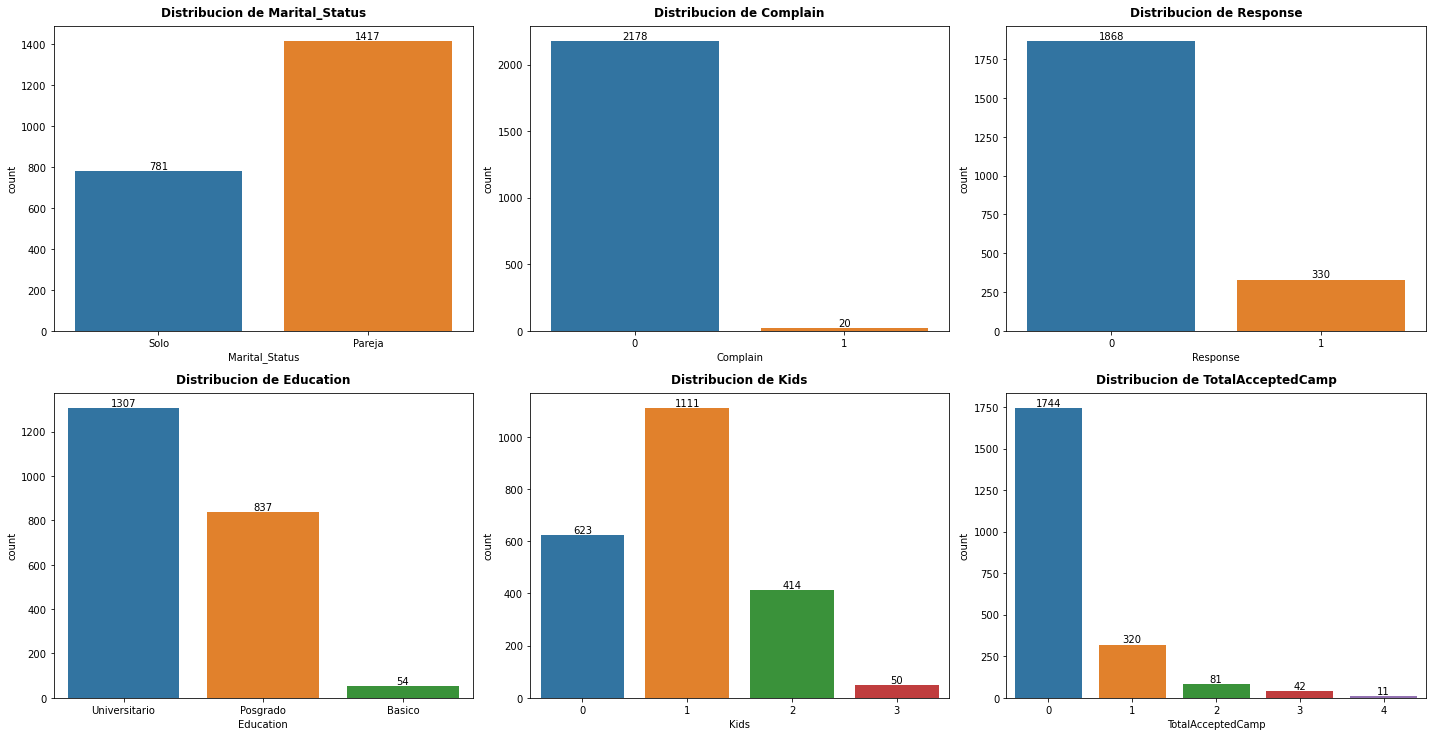

In [211]:
x = 1

plt.figure(figsize=(20,15))
for col in var_binary+var_category:
    plt.subplot(3,3,x)
    ax = sns.countplot(data=df, x=col)
    plt.title(f'Distribucion de {col}', pad=10, fontweight='bold', fontsize=12)
    ax.bar_label(ax.containers[0])
    plt.tight_layout()
    x += 1

> La mayoria de los clientes tienen parejas.

> La mayoria tienen un nivel de educacion universitaria.

> La mayoria de los clientes tienen un hijo.

> La mayoria de los clientes no se han quejado en los ultimos 2 años.

> La mayoria nunca a aceptado ofertas en campañas.

Estas conclusiones indican un perfil de cliente especifico al que atiende la empresa.

__Analisis de correlacion entre las variables__

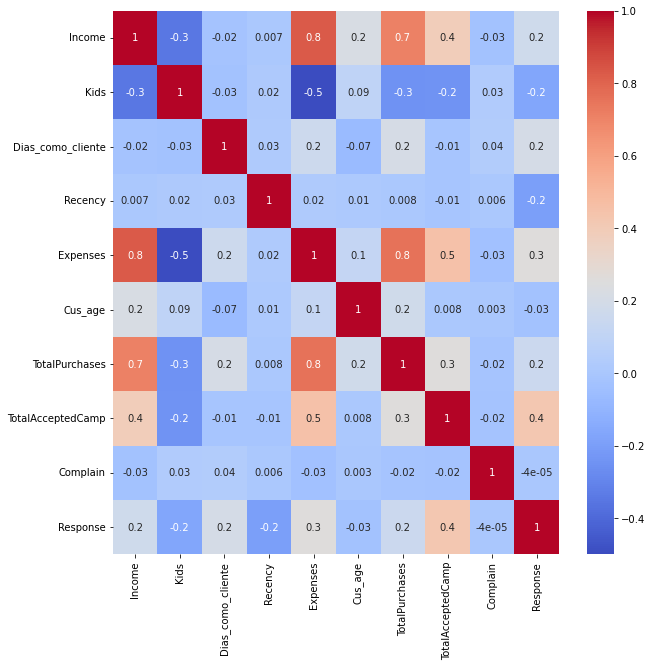

In [212]:
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,10))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt='.1g')
plt.show()

De la matriz de correlacion se concluye:

> Las caracteristicas con mayor correlacion son Income, Expenses y TotalPurchases

### Exportar Datos procesados

Vamos a exportar el DataFrame con los datos procesados para luego utilizarlo en otro archivo para entrenar el modelo

In [213]:
df.to_csv('data_processing.csv', index=False)